In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
# Set plot style
sns.set(style="whitegrid")
# 1. Load the data
file_path = 'AQI and Lat Long of Countries.csv'  
aqi_data = pd.read_csv(file_path)

In [4]:
aqi_data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [8]:
aqi_data.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [10]:
# 2. Data Cleaning
# Drop rows with missing 'Country' values
aqi_data_cleaned = aqi_data.dropna(subset=['Country'])

In [11]:
# 3. Geospatial Heatmap of AQI
# Create a base map
aqi_map = folium.Map(location=[20, 0], zoom_start=2)

# Prepare data for heatmap
heatmap_data = aqi_data_cleaned[['lat', 'lng', 'AQI Value']].values
# Add heatmap layer
HeatMap(heatmap_data, radius=8, blur=5, max_zoom=1).add_to(aqi_map)


aqi_map

C:\Users\nour-pc\AppData\Local\Temp\ipykernel_14484\3788755018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_by_country.values, y=aqi_by_country.index, palette='coolwarm')


AQI comparison bar chart saved as 'aqi_by_country.png'.


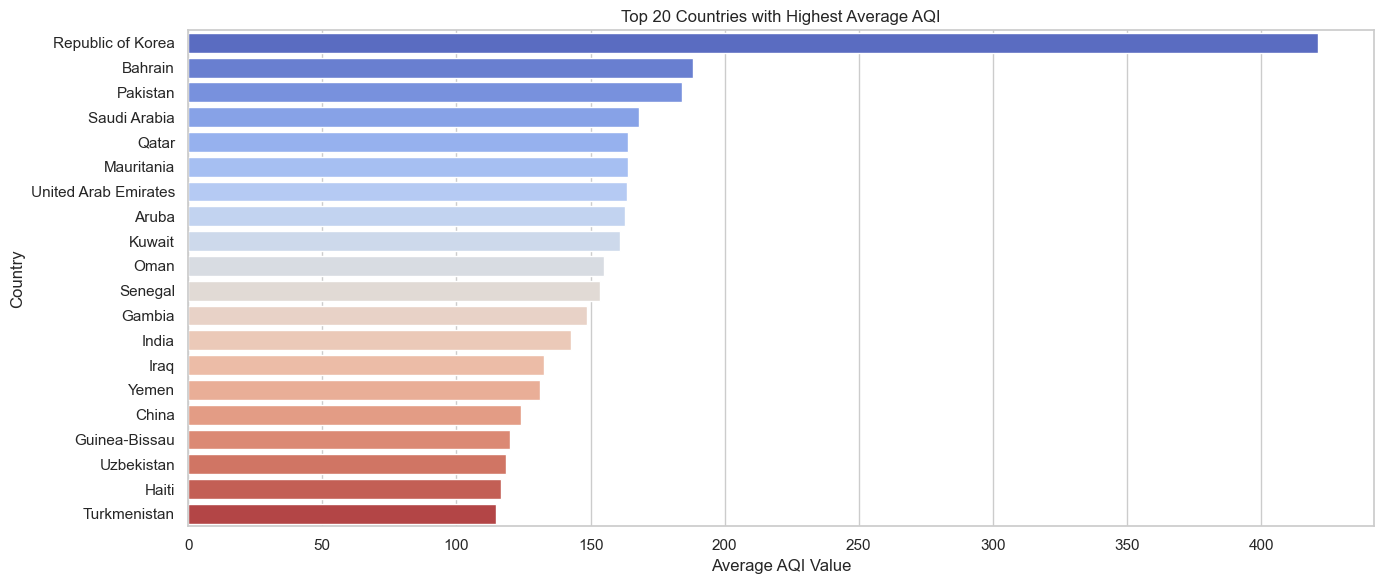

In [12]:
# 4. AQI Comparison by Country
# Aggregate AQI values by country
aqi_by_country = aqi_data_cleaned.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(20)

# Plot AQI comparison
plt.figure(figsize=(14, 6))
sns.barplot(x=aqi_by_country.values, y=aqi_by_country.index, palette='coolwarm')
plt.title('Top 20 Countries with Highest Average AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("aqi_by_country.png")
print("AQI comparison bar chart saved as 'aqi_by_country.png'.")

C:\Users\nour-pc\AppData\Local\Temp\ipykernel_13428\4182977835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_means.values, y=pollutants, palette='viridis')


Pollutant breakdown chart saved as 'pollutant_breakdown.png'.


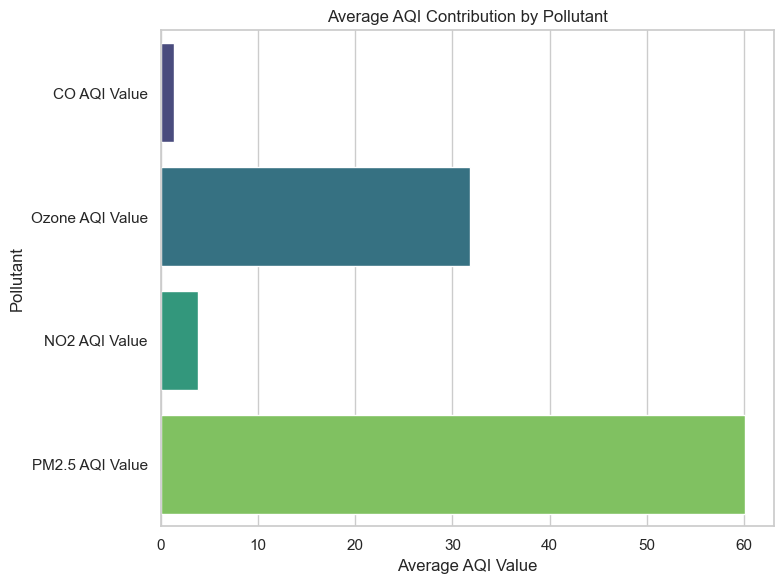

In [22]:
# 5. Pollutant Breakdown
# Aggregate pollutants (CO, Ozone, NO2, PM2.5)
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
pollutant_means = aqi_data_cleaned[pollutants].mean()

# Plot pollutant breakdown
plt.figure(figsize=(8, 6))
sns.barplot(x=pollutant_means.values, y=pollutants, palette='viridis')
plt.title('Average AQI Contribution by Pollutant')
plt.xlabel('Average AQI Value')
plt.ylabel('Pollutant')
plt.tight_layout()
plt.savefig("pollutant_breakdown.png")
print("Pollutant breakdown chart saved as 'pollutant_breakdown.png'.")

AQI category distribution pie chart saved as 'aqi_category_distribution.png'.


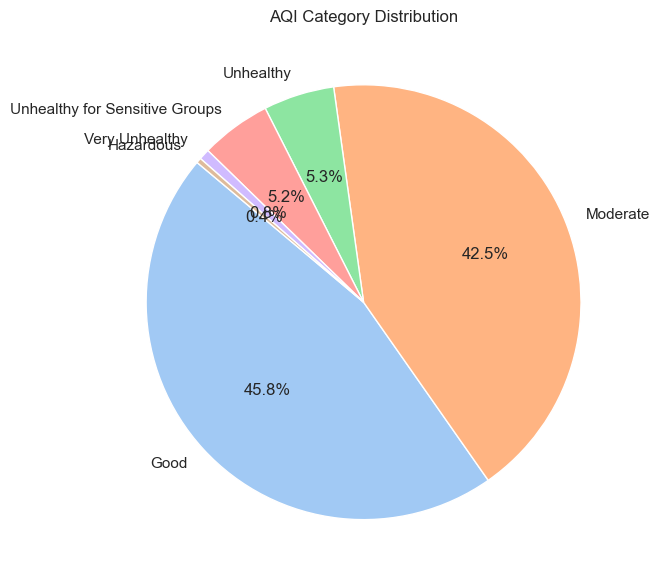

In [23]:
# 6. AQI Category Distribution
# Count AQI categories
aqi_categories = aqi_data_cleaned['AQI Category'].value_counts()

# Plot AQI category distribution
plt.figure(figsize=(8, 6))
plt.pie(aqi_categories.values, labels=aqi_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('AQI Category Distribution')
plt.tight_layout()
plt.savefig("aqi_category_distribution.png")
print("AQI category distribution pie chart saved as 'aqi_category_distribution.png'.")


C:\Users\nour-pc\AppData\Local\Temp\ipykernel_13428\2417528288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities['AQI Value'], y=top_10_cities['City'], palette='Reds_r')


Top 10 polluted cities chart saved as 'top_10_cities.png'.


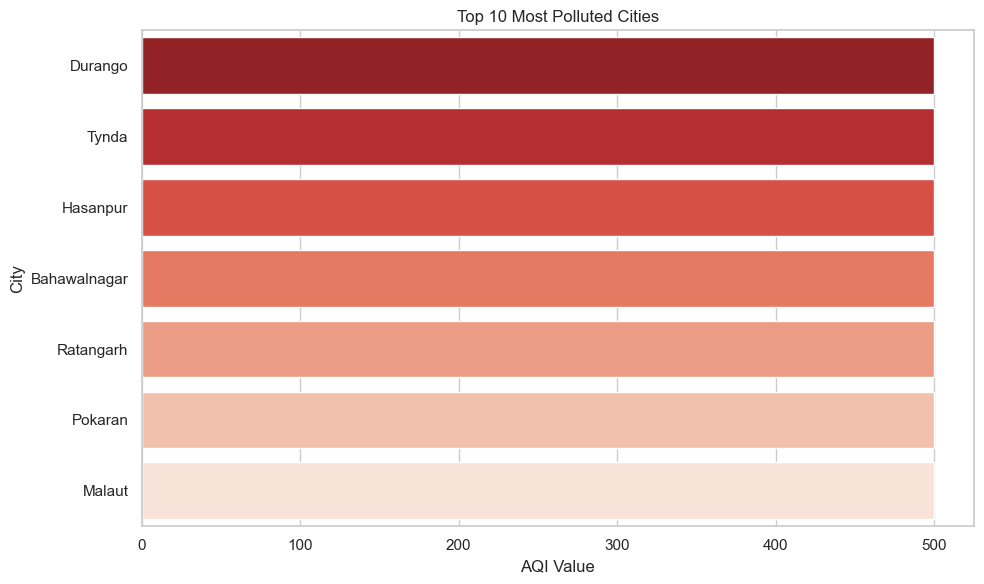

In [24]:
# 7. Top 10 Most Polluted Cities
top_10_cities = aqi_data_cleaned[['City', 'AQI Value']].sort_values(by='AQI Value', ascending=False).head(10)

# Plot Top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities['AQI Value'], y=top_10_cities['City'], palette='Reds_r')
plt.title('Top 10 Most Polluted Cities')
plt.xlabel('AQI Value')
plt.ylabel('City')
plt.tight_layout()
plt.savefig("top_10_cities.png")
print("Top 10 polluted cities chart saved as 'top_10_cities.png'.")


In [25]:
# 8. Summary of Results
print("\n--- Summary of Results ---")
print(f"Total Cleaned Data Rows: {len(aqi_data_cleaned)}")
print(f"Top Pollutants:\n{pollutant_means}")
print(f"Top 10 Most Polluted Cities:\n{top_10_cities}")


--- Summary of Results ---
Total Cleaned Data Rows: 16393
Top Pollutants:
CO AQI Value        1.349356
Ozone AQI Value    31.794424
NO2 AQI Value       3.851156
PM2.5 AQI Value    60.075520
dtype: float64
Top 10 Most Polluted Cities:
               City  AQI Value
3768        Durango        500
15896         Tynda        500
10673      Hasanpur        500
203    Bahawalnagar        500
14081     Ratangarh        500
14738       Pokaran        500
3769        Durango        500
12703        Malaut        500
14080     Ratangarh        500
3770        Durango        500
